In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [194]:
df_train.columns.shape

(18,)

In [251]:
selected_column=['family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','Weight', 'Height','SMOKE', 'CH2O', 'SCC', 'FAF','CAEC', 'TUE', 'CALC', 'MTRANS','Gender', 'Age']

X = df_train[selected_column]
y= df_train[['NObeyesdad']]

X=pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.001,random_state =123)


Index(['FCVC', 'NCP', 'Weight', 'Height', 'CH2O', 'FAF', 'TUE', 'Age',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Female',
       'Gender_Male'],
      dtype='object')


In [248]:
X.head()

,FCVC,NCP,Weight,Height,CH2O,FAF,TUE,Age,family_history_with_overweight_no,family_history_with_overweight_yes,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
0,2.00,2.98,81.67,1.70,2.76,0.00,0.98,24.44,False,True,...,False,True,False,False,False,False,True,False,False,True
1,2.00,3.00,57.00,1.56,2.00,1.00,1.00,18.00,False,True,...,False,False,True,True,False,False,False,False,True,False
2,1.88,1.41,50.17,1.71,1.91,0.87,1.67,18.00,False,True,...,False,False,True,False,False,False,True,False,True,False
3,3.00,3.00,131.27,1.71,1.67,1.47,0.78,20.95,False,True,...,False,True,False,False,False,False,True,False,True,False
4,2.68,1.97,93.80,1.91,1.98,1.97,0.93,31.64,False,True,...,False,True,False,False,False,False,True,False,False,True


In [260]:

X_submit = df_test[selected_column]

X_submit=pd.get_dummies(X_submit)
X_submit.drop(columns='CALC_Always',inplace=True)
print("x",X.columns)
X_submit.columns

x Index(['FCVC', 'NCP', 'Weight', 'Height', 'CH2O', 'FAF', 'TUE', 'Age',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Female',
       'Gender_Male'],
      dtype='object')


Index(['FCVC', 'NCP', 'Weight', 'Height', 'CH2O', 'FAF', 'TUE', 'Age',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
number_of_classes=y.NObeyesdad.nunique()
print(number_of_classes)

In [261]:
params = {
'objective': 'multiclass',
'boosting_type': 'gbdt',
'num_leaves': 31,
'learning_rate': 0.08,
'feature_fraction': 0.9,
'num_classes':number_of_classes
}
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2068
[LightGBM] [Info] Number of data points in the train set: 20737, number of used features: 30
[LightGBM] [Info] Start training from score -2.106471
[LightGBM] [Info] Start training from score -1.906990
[LightGBM] [Info] Start training from score -1.964798
[LightGBM] [Info] Start training from score -1.855112
[LightGBM] [Info] Start training from score -1.634933
[LightGBM] [Info] Start training from score -2.146088
[LightGBM] [Info] Start training from score -2.109647


LGBMClassifier(feature_fraction=0.9, learning_rate=0.08, num_classes=7,
               objective='multiclass')

In [262]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions,digits=5))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
                     precision    recall  f1-score   support

      Normal_Weight    1.00000   1.00000   1.00000         2
     Obesity_Type_I    1.00000   1.00000   1.00000         3
    Obesity_Type_II    1.00000   1.00000   1.00000         4
   Obesity_Type_III    1.00000   1.00000   1.00000         3
 Overweight_Level_I    0.66667   1.00000   0.80000         2
Overweight_Level_II    1.00000   0.85714   0.92308         7

           accuracy                        0.95238        21
          macro avg    0.94444   0.97619   0.95385        21
       weighted avg    0.96825   0.95238   0.95531        21



<AxesSubplot:title={'center':'LightGBM Feature Importance (Gain)'}, xlabel='Feature importance', ylabel='Features'>

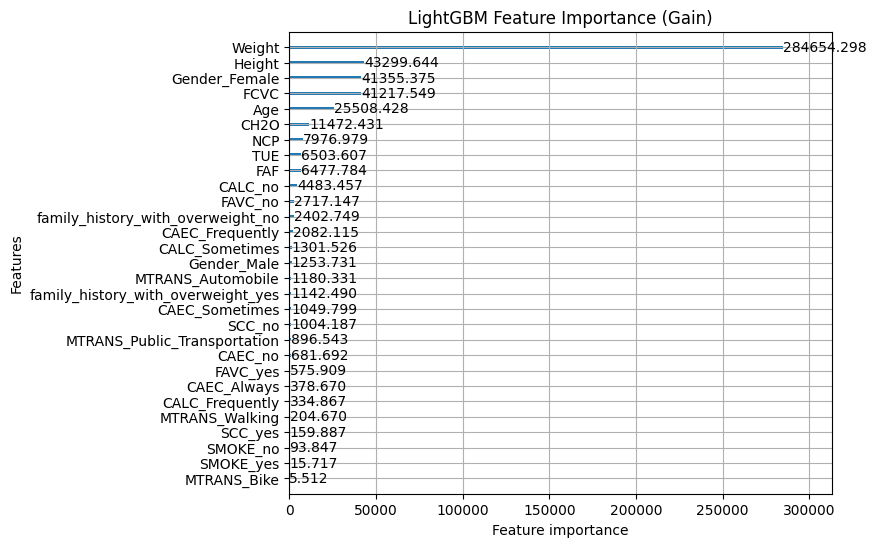

In [263]:
import matplotlib as plt
lgb.plot_importance(clf, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")


SUBMISSION FILE

In [264]:
predictions = clf.predict(X_submit)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [265]:
np.savetxt(
    'submission.csv',
    np.rec.fromarrays([df_test.id, predictions]),
    fmt=['%d', '%s'],
    delimiter=',',
    header='id,NObeyesdad',
    comments='',
)